<a href="https://colab.research.google.com/github/vkjadon/AjaxAcadPlus/blob/master/19NN2L_OOPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muhammeddalkran/catvnoncat

  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 192MB/s]


In [4]:
!unzip /content/catvnoncat.zip -d /content

Archive:  /content/catvnoncat.zip
  inflating: /content/catvnoncat/test_catvnoncat.h5  
  inflating: /content/catvnoncat/train_catvnoncat.h5  


In [1]:
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [5]:
# Loading the data (cat/non-cat) from the File downloaded from the Kaggle
train_dataset = h5py.File('/content/catvnoncat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/catvnoncat/test_catvnoncat.h5', "r")
#train set features
train_set_x_orig = np.array(train_dataset["train_set_x"][:])

#train set labels
train_set_y = np.array(train_dataset["train_set_y"][:])

#test set features
test_set_x_orig = np.array(test_dataset["test_set_x"][:])

#test set labels
test_set_y = np.array(test_dataset["test_set_y"][:])

In [6]:
# Training Data

train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
y = train_set_y.reshape((1, train_set_y.shape[0]))

X = train_set_x_flatten / 255.

# Test Data
test_set_x_flatten=test_set_x_orig.reshape (test_set_x_orig.shape[0],-1).T
y_test = test_set_y.reshape((1, test_set_y.shape[0]))

X_test = test_set_x_flatten / 255.

In [7]:
nx, m_train = X.shape
nh = 4
ny = y.shape[0] # size of output layer

In [8]:

W1 = np.random.randn(nh, nx) * 0.01
b1 = np.zeros(shape=(nh, 1))
W2 = np.random.randn(ny, nh) * 0.01
b2 = np.zeros(shape=(ny, 1))

In [43]:
class Weight_Initialization:
  def __init__(self, rows, cols):
    np.random.seed(2)
    self.W=np.random.randn(rows, cols)
    self.b=np.zeros((rows,1))

In [44]:
parameters1=Weight_Initialization(nh, nx)
parameters2=Weight_Initialization(nh, ny)

In [45]:
W1=parameters1.W
b1=parameters1.b
W2=parameters1.W
b2=parameters1.b

In [26]:
class Layer_Dense:
  def forward(self, A):
    self.Z=np.dot(self.W, A) + self.b

In [27]:
Layer1=Layer_Dense(W1,b1)
Layer2=Layer_Dense(W2,b2)

In [28]:
print(Layer2.W)

[[-0.41675785 -0.05626683 -2.1361961   1.64027081]]


In [ ]:
Layer1.forward(X)
# print(Layer1.Z)
Layer2.forward(Layer1.Z)
print(Layer2.Z)

In [41]:
learning_rate=0.005
max_iteration=300
cost=np.zeros((max_iteration))
for i in range(max_iteration):

  #Forward Propagation
  Layer1.forward(X)
  Z1 = Layer1.Z
  A1 = np.tanh(Z1)

  Layer2.forward(A1)
  Z2 = Layer2.Z
  A2 = 1/(1+np.exp(-Z2))

  #Calculate Cost
  cost[i] = - np.sum(np.multiply(np.log(A2), y) + np.multiply((1 - y), np.log(1 - A2))) / m_train

  #Calculate Derivatives

  #Output Layer
  dZ2= A2 - y
  dW2 = (1 / m_train) * np.dot(dZ2, A1.T)
  db2 = (1 / m_train) * np.sum(dZ2, axis=1, keepdims=True)

  #Hidden Layer
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
  dW1 = (1 / m_train) * np.dot(dZ1, X.T)
  db1 = (1 / m_train) * np.sum(dZ1, axis=1, keepdims=True)

  #Update Parameters

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

print(cost[i])

2.061822509108288


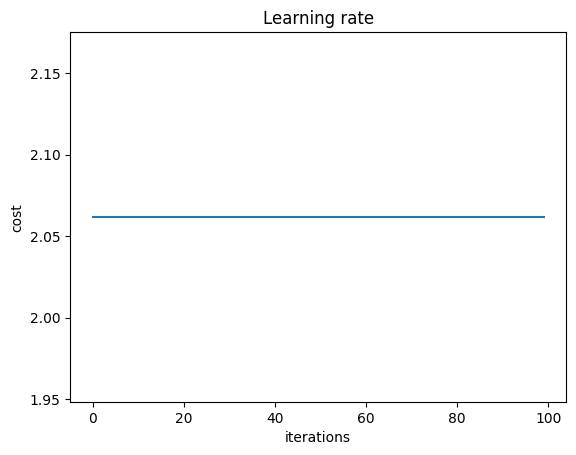

In [40]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()